# Visualizing Earnings Based on College Majors

In this project we will be working with a data of the job outcomes of graduates from college between 2010 and 2012.
Using visualizations, we'll try to answer following questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees, median salary and total number of students in major??
- How many majors are predominantly male? Predominantly female?
- What's the most common median salary range?
- Which category of majors have the most students?

Let's start with importing the libraries!

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns",50)


We'll read, explore and clean the data. 

Below are information about some columns from the dataset:
- __Rank__ - Rank by median earnings (the dataset is ordered by this column).
- __Major_code__ - Major code.
- __Major__ - Major description.
- __Major_category__ - Category of major.
- __Total__ - Total number of people with major.
- __Sample_size__ - Sample size (unweighted) of full-time, year-round ONLY (used for earnings).
- __Men__ - Male graduates.
- __Women__ - Female graduates.
- __ShareWomen__ - Women as share of total.
- __Employed__ - Number employed.
- __Median__ - Median salary of full-time, year-round workers.
- __Low_wage_jobs__ - Number in low-wage service jobs.
- __Full_time__ - Number employed 35 hours or more.
- __Part_time__ - Number employed less than 35 hours.

In [52]:
recent_grads = pd.read_csv(r'Data\recent_grads.csv', delimiter=';')

In [53]:
#Looking at the first 5 rows of the dataset.
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [54]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [55]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [56]:
#Removing rows, which contain missing values
recent_grads = recent_grads.dropna()
len(recent_grads)
# Only one row was dropped

172

### Do students in more popular majors make more money?

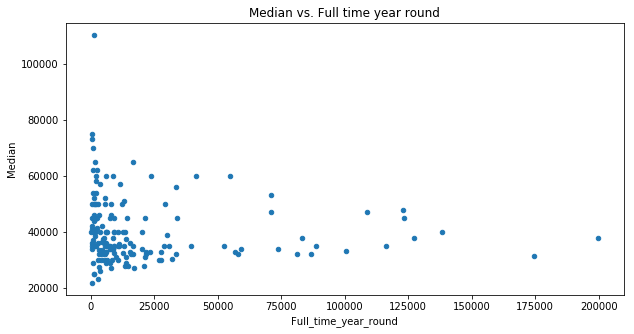

In [197]:
recent_grads.plot(x='Full_time_year_round', y='Median', kind='scatter', title='Median vs. Full time year round', figsize=(10,5))
plt.show()

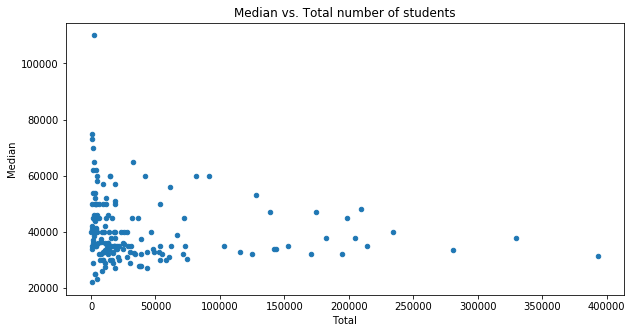

In [198]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Median vs. Total number of students', figsize=(10,5))
plt.show()

From the scatter plots above we can observe that in more popular majors students don't earn more money. 

### Do students that majored in subjects that were majority female make more money?


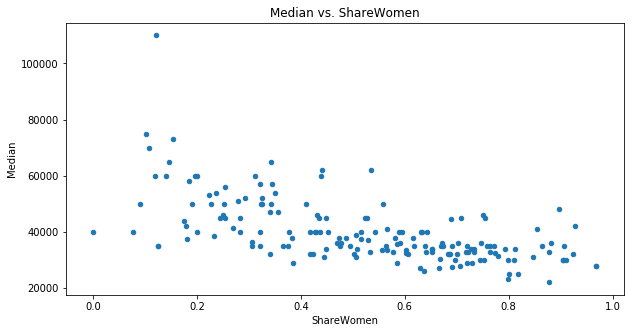

In [199]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Median vs. ShareWomen', figsize=(10,5))
plt.show()

From above we see, that students that majored in subjects that were majority female make less money. The higher percentage of women within the students the lowest median is.

### Is there any link between the number of full-time employees, median salary and total number of students in major?

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


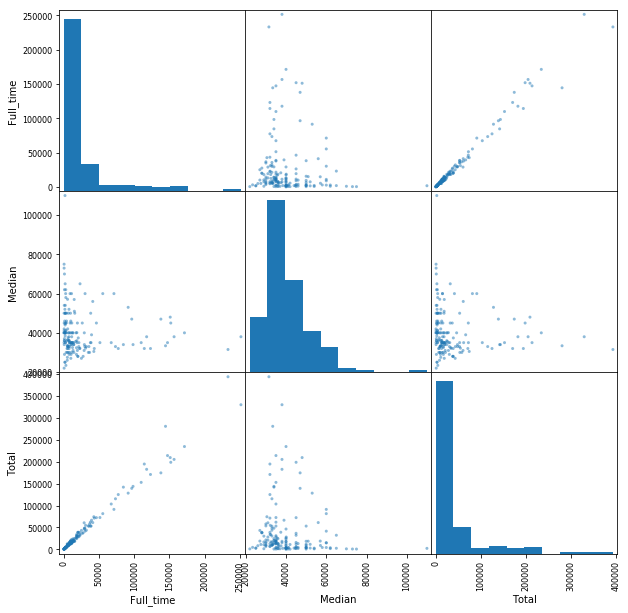

In [196]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Full_time','Median','Total']], figsize=(10,10))
plt.show()

Based on scatter plot above, there is no pattern in relationship between number of full-time employees and median salary. The same conclusion we have for total number of students and median salary. The only strong link we can observe between total number of students and full-time employees, which is pretty obvious, that the more graduates, the more full-time employees we will have.

### How many majors are predominantly male? Predominantly female?

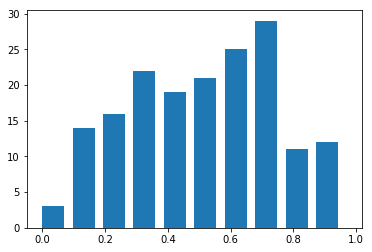

In [195]:
plt.hist(recent_grads["ShareWomen"], bins=10, align='mid', width=0.07)
plt.show()

In [120]:
predom_female = 0
for index, row in recent_grads.iterrows():
    if row["ShareWomen"] > 0.5:
        predom_female += 1
print(predom_female)

96


In [121]:
predom_male = 0
for index, row in recent_grads.iterrows():
    if row["ShareWomen"] < 0.5:
        predom_male += 1
print(predom_male)

76


There is 96 predominantly female majors and 76 predominantly male majors. The highest number of majors is for around 70% women ratio.

### What's the most common median salary range?

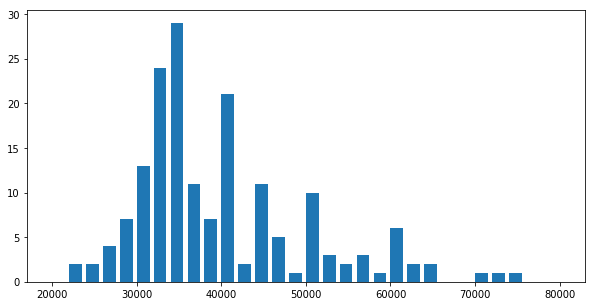

In [162]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(recent_grads["Median"], bins = 30, range=(20000,80000), align='mid', width=1500)
plt.show()

The most common median salary range is the one between 34000 and 36000 U.S.D. per year. Now we can use a box plot to explore the distributions of median salaries.

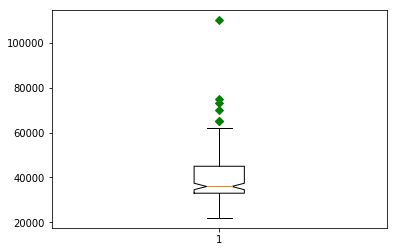

In [194]:
plt.figure()
plt.boxplot(recent_grads["Median"], 1, 'gD')
plt.show()

From above we can see that indeed median salary range is somewhere between 34000 and 36000 U.S.D. We can also notice coulpe outliers, especially the one greater than 100000$. Let's verify this point.

In [200]:
print(recent_grads[recent_grads["Median"]>100000])

   Rank  Major_code                  Major   Total     Men  Women  \
0     1        2419  PETROLEUM ENGINEERING  2339.0  2057.0  282.0   

  Major_category  ShareWomen  Sample_size  Employed  Full_time  Part_time  \
0    Engineering    0.120564           36      1976       1849        270   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534               364            193  


The data looks correct, so the major Petroleum Engineering is the ona with the highest median of salary.

### Which category of majors have the most students?

In [168]:
students_per_category = {}
for index, row in recent_grads.iterrows():
    if row["Major_category"] in students_per_category:
        students_per_category[row["Major_category"]] += row["Total"]
    else:
        students_per_category[row["Major_category"]] = row["Total"]
print(students_per_category)

{'Engineering': 537583.0, 'Business': 1302376.0, 'Physical Sciences': 185479.0, 'Law & Public Policy': 179107.0, 'Computers & Mathematics': 299008.0, 'Industrial Arts & Consumer Services': 229792.0, 'Arts': 357130.0, 'Health': 463230.0, 'Social Science': 529966.0, 'Biology & Life Science': 453862.0, 'Education': 559129.0, 'Agriculture & Natural Resources': 75620.0, 'Humanities & Liberal Arts': 713468.0, 'Psychology & Social Work': 481007.0, 'Communications & Journalism': 392601.0, 'Interdisciplinary': 12296.0}


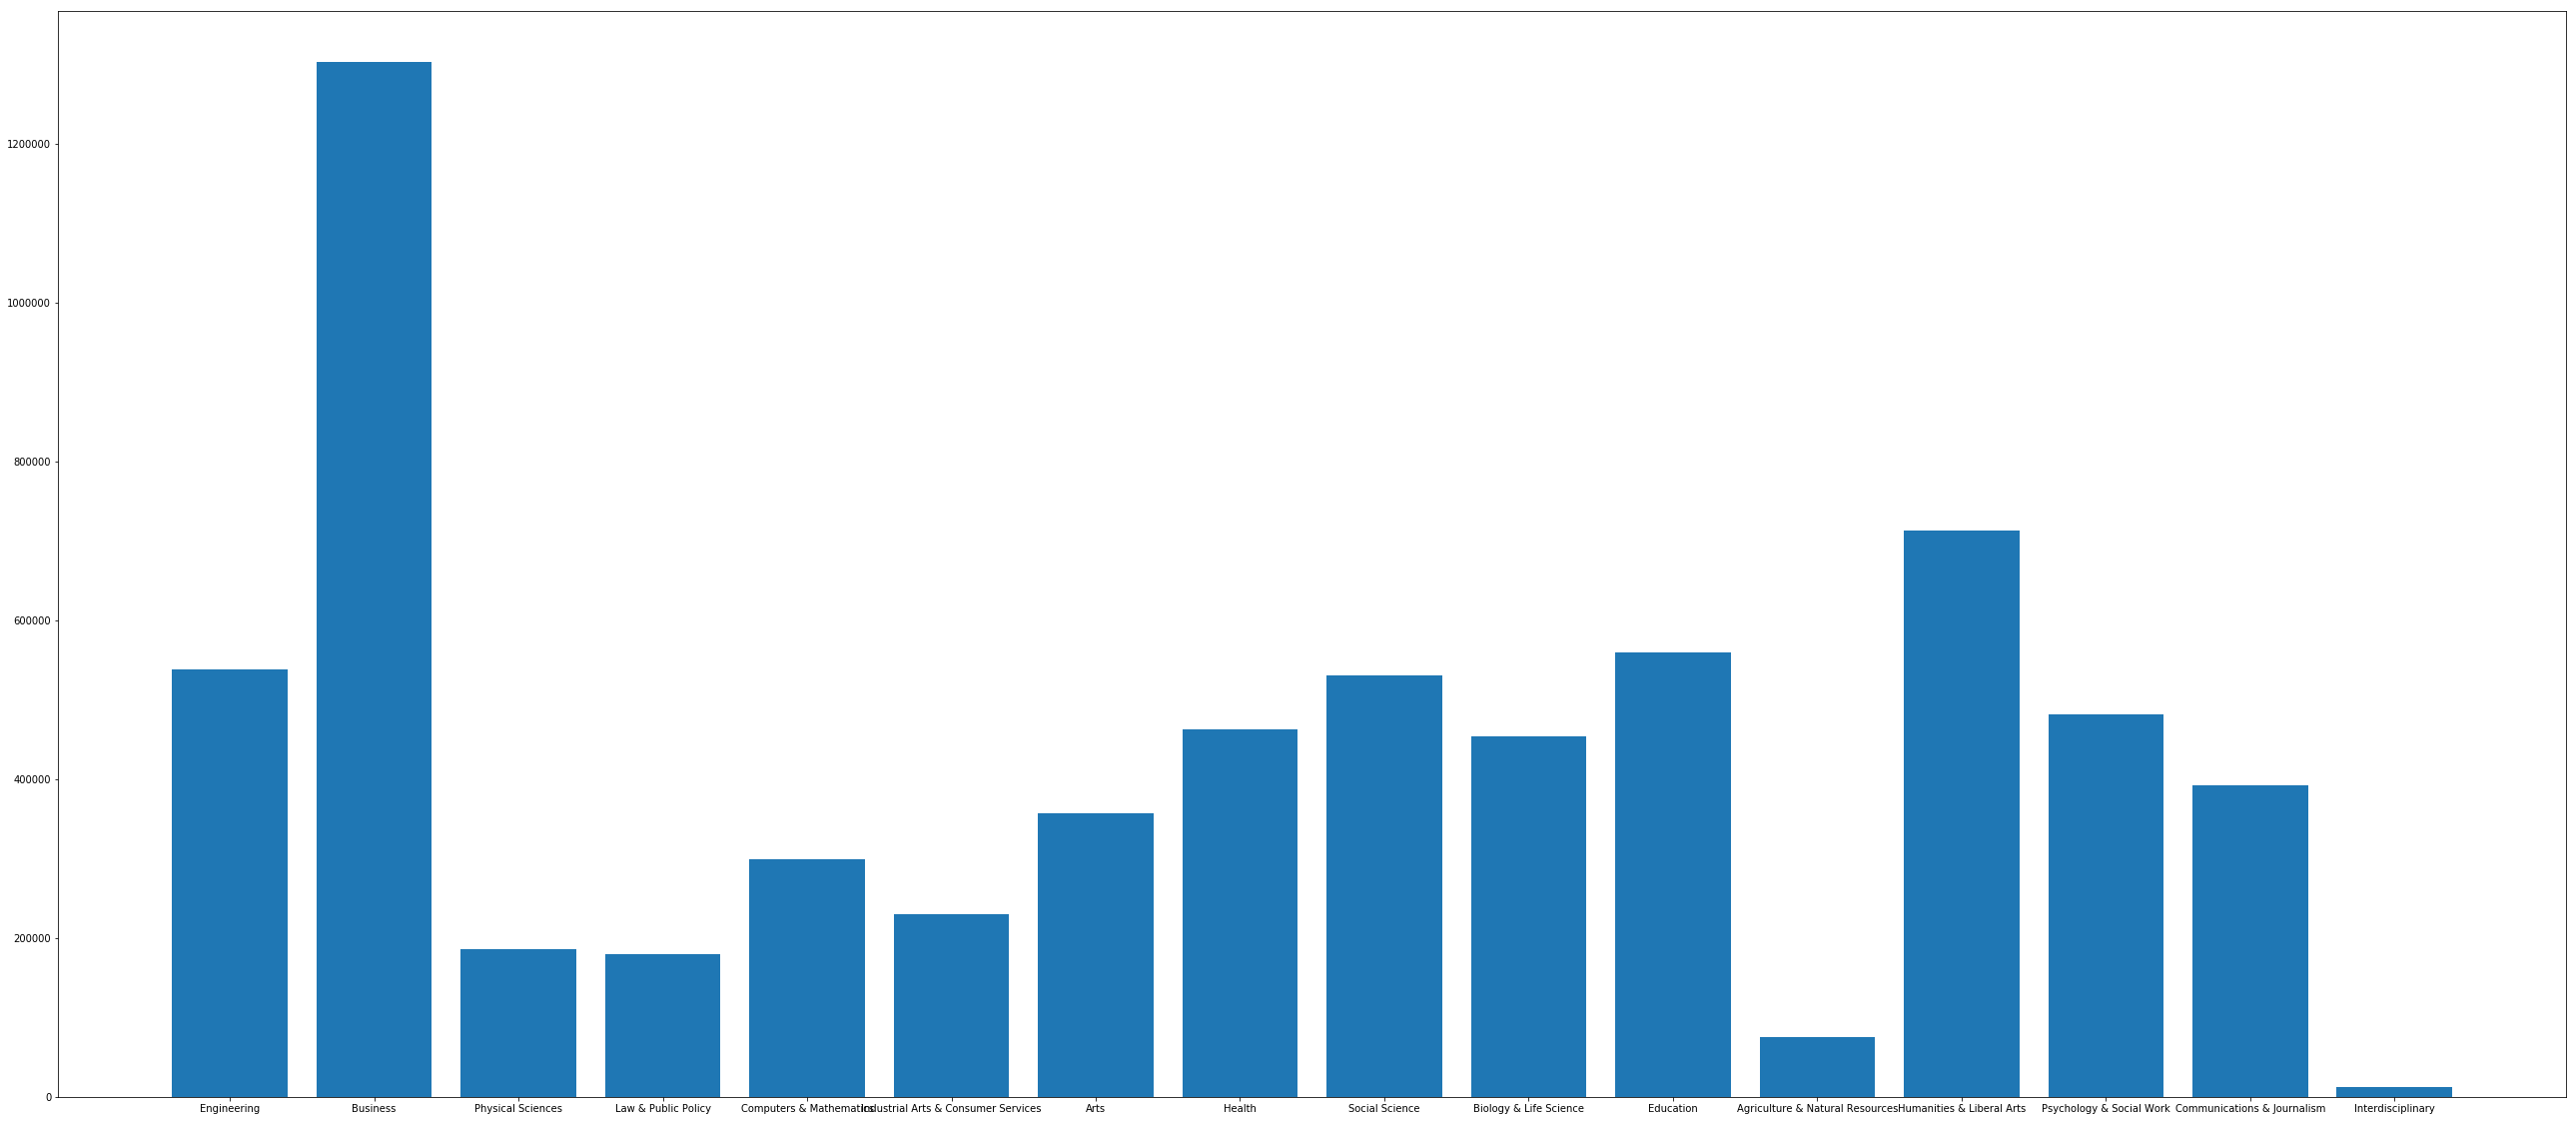

In [185]:
fig = plt.figure(figsize=(45,20))
plt.bar(range(len(students_per_category)), list(students_per_category.values()), align='center')
plt.xticks(range(len(students_per_category)), list(students_per_category.keys()))
plt.show()

Category of major, that has the most students is Business (1302376 students).